<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Detect_Covid_19_through_X_ray_images_of_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1BFc2Lt2N1swO8BKRvLMEyUhLzF52RFvr',
dest_path='content/covid_image_data.zip',unzip=True)

Unzipping...Done.


# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing

In [4]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
#
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set
from sklearn.metrics import f1_score
from PIL import Image

In [5]:
train = pd.read_csv("/content/content/covid_image_data/Training_set_covid.csv")
train.head()

,filename,label
0,Image_1.jpg,1
1,Image_2.jpg,0
2,Image_3.jpg,0
3,Image_4.jpg,0
4,Image_5.jpg,0


In [6]:
test = pd.read_csv("/content/content/covid_image_data/Testing_set_covid.csv")
test.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


##Image Preprocessing using openCV

In [7]:
train_image_path = "/content/content/covid_image_data"
image_list = train.filename.values.tolist()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
COLOR = 'blue'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [ ]:
!mkdir /content/Covid

In [ ]:
!mkdir /content/Covid/Processed
!mkdir /content/Covid/Processed/Train
!mkdir /content/Covid/Processed/Train/Covid_0
!mkdir /content/Covid/Processed/Train/Covid_1

In [ ]:
!mkdir /content/Covid/Processed/Test

In [ ]:
!mkdir /content/covid
!mkdir /content/covid/Processed
!mkdir /content/covid/Processed/Train
!mkdir /content/covid/Processed/Test

In [ ]:
!mkdir /content/covid/Processed/Train/Covid_1
!mkdir /content/covid/Processed/Train/Covid_0

In [ ]:
import shutil
for i in os.listdir("/content/Covid/Processed/Train/Covid_0"):
  shutil.move("/content/Covid/Processed/Train/Covid_0"+i,"/content/covid/Processed/Train/Covid_0")

In [ ]:
for i in os.listdir("/content/Covid/Processed/Train/Covid_1"):
  shutil.move("/content/Covid/Processed/Train/Covid_1"+i,"/content/covid/Processed/Train/Covid_1")

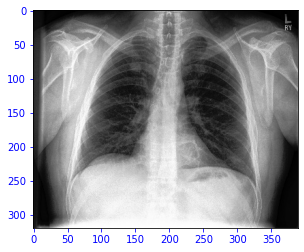

In [ ]:
plt.imshow(Image.open("/content/content/covid_image_data/train/Image_2631.jpg"))

In [ ]:
random_index = np.random.randint(len(train))
image_path= train_image_path + "/train/" + image_list[random_index ]
image_original = cv2.imread(image_path)

#Preprocess Image
image_processed = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_processed = cv2.resize(image_processed,(128,128))
image_processed = cv2.equalizeHist(image_processed)
#image_processed = cv2.medianBlur(image_processed ,3)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image_processed  = clahe.apply(image_processed )
image_processed  = cv2.cvtColor(image_processed,cv2.COLOR_GRAY2BGR)


cv2.imwrite(image_list[random_index ], image_processed)

True

Text(0.5, 1.0, 'Clahe image Label : Non_Covid')

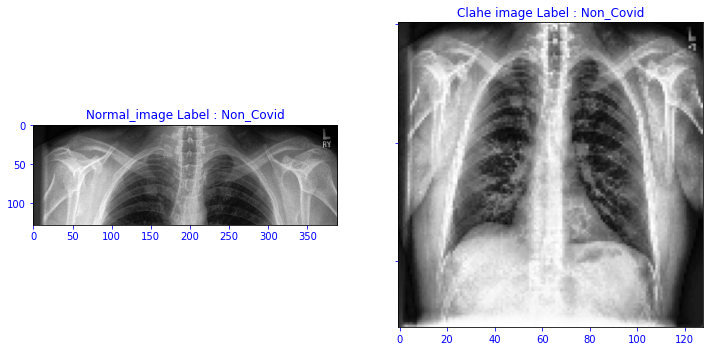

In [ ]:
label = train.iloc[random_index]['label']
ddict = {1:'COVID affected',0:'Non_Covid'}
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,10))

ax1.imshow(image_original)
ax2.imshow(image_processed)

ax1.set_title(f'Normal_image Label : {ddict[label]}')
ax2.set_title(f'Clahe image Label : {ddict[label]}')

## **Transfer Learning**

In [8]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

**Initialize lists**

In [10]:
data = [] # has processed image
labels = []


In [13]:
def image_preprocessing(path,img_size):
  for i in os.listdir(path):
    image_path = path + "/" + i
    #print(image_path)
    image_original = cv2.imread(image_path)
    #Preprocess Image
    image_processed = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image_processed = cv2.equalizeHist(image_processed)
    #image_processed = cv2.medianBlur(image_processed ,5)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    image_processed  = clahe.apply(image_processed )
    image_processed  = cv2.cvtColor(image_processed,cv2.COLOR_GRAY2RGB)
    image_processed  = cv2.resize(image_processed,(img_size,img_size))
    data.append(image_processed)
    lbl = train[train['filename'] == i]['label'].tolist()[0]
    if lbl == 0:
      labels.append(0)
    else:
      labels.append(1)
  return data,labels


In [ ]:
feature,label = image_preprocessing("/content/content/covid_image_data/train",128)

In [ ]:
len(feature)

NameError: ignored

#### **Image processing without equalizer and blurring**

In [9]:
data1 = [] #has unprocessed image
label1 = []

In [10]:
def image_processing(path,img_size):
  for i in os.listdir(path):
    image_path = path + "/" +i
    #Preprocess Image
    image_processed = cv2.imread(image_path)
    image_processed  = cv2.cvtColor(image_processed,cv2.COLOR_BGR2RGB)
    image_processed  = cv2.resize(image_processed,(img_size,img_size))
    data1.append(image_processed)
    lbl = train[train['filename'] == i]['label'].tolist()[0]
    if lbl == 0:
      label1.append(0)
    else:
      label1.append(1)
  return data1,label1


In [11]:
feature1,label1 = image_processing("/content/content/covid_image_data/train",224)

## **convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0, 255]**

In [ ]:
feature= np.array(feature) / 255.0
label = np.array(label)

In [12]:
feature1 = np.array(feature1) / 255
label1 = np.array(label1)

In [13]:
feature1.shape,label1.shape

((3479, 224, 224, 3), (3479,))

# **perform one-hot encoding on the labels when the final output layer has 2 classes to be present**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
lb = LabelBinarizer()
label = lb.fit_transform(label)
label = to_categorical(label)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
lb = LabelBinarizer()
label1 = lb.fit_transform(label1)
label1 = to_categorical(label1)

## **partition the data into training and testing splits using 80% of the data for training and the remaining 20% for testing**

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(feature, label,test_size=0.20, stratify=label, random_state=42)

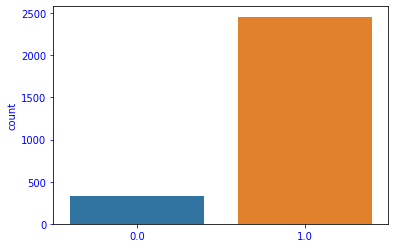

In [ ]:
import seaborn as sns
sns.countplot([y[0] for y in trainY.tolist()])

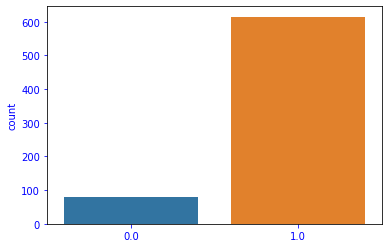

In [ ]:
sns.countplot([y[0] for y in testY.tolist()])

In [ ]:
np.unique(label1)

array([0, 1])

#### **train test split the simple processed images**

In [14]:
(trainX1, testX1, trainY1, testY1) = train_test_split(feature1, label1,test_size=0.20, stratify=label1, random_state=42)

## **initialize the training data augmentation object**

In [15]:
trainAug = ImageDataGenerator(rescale=1.0/255.0,
                              rotation_range=10,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest")



In [16]:
train_generator = trainAug.flow(trainX1,trainY1,batch_size=8)


#### **load the VGG16 network, ensuring the head FC layer sets are left off**

In [17]:
conv_base = VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [18]:
train_layers = [layer.name for layer in conv_base.layers[::-1][:5]]

train_layers

['block5_pool', 'block5_conv3', 'block5_conv2', 'block5_conv1', 'block4_pool']

#### **construct the head of the model that will be placed on top of the the base model**

In [22]:
model = Sequential()

model.add(conv_base)

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

#conv_base.trainable = False

for layer in conv_base.layers:
  if layer.name in train_layers:
    layer.trainable = True
  else:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=1e-5),
loss='binary_crossentropy',
metrics=['accuracy',f1_m])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 27,560,769
Trainable params: 19,925,505
Non-trainable params: 7,635,264
_________________________________________________________________


#### **place the head FC model on top of the base model (this will becomethe actual model we will train)**

In [33]:
BS = 8

In [ ]:
model.fit(train_generator,steps_per_epoch=87,epochs=30,validation_data=(testX1,testY1),validation_steps=22,class_weight={0:1,1:2})

Epoch 1/30


In [34]:
history = model.fit(
	trainAug.flow(trainX1, trainY1, batch_size=BS),
	steps_per_epoch=len(trainX1) // BS,
	validation_data=(testX1, testY1),
	validation_steps=len(testX1) // BS,
	epochs=EPOCHS)

NameError: ignored

#### **make predictions on test set**

In [51]:
preds = model.predict(testX1)

In [52]:
preds[0]

array([1.0883767e-09], dtype=float32)

In [53]:
prediction = []
for value in preds:
  if value < 0.5:
     prediction.append(0)
  else:
    prediction.append(1)

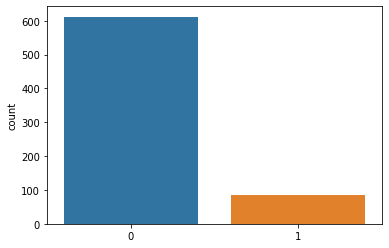

In [54]:
sns.countplot(prediction)

In [55]:
from sklearn.metrics import f1_score,accuracy_score
f1_score(testY1,prediction)

0.8363636363636364

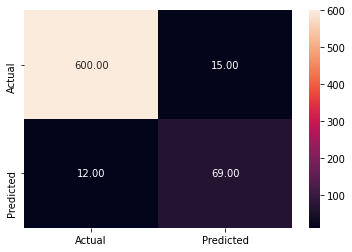

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(testY1,prediction)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

In [57]:
test_pixel_data = [] # initialize an empty numpy array
image_size = 224 # image size taken is 100 here. one can take other size too
for i in range(len(test_images)):
  image_processed= cv2.imread(test_images['filepaths'][i]) # converting the image to gray scale
  image_processed  = cv2.cvtColor(image_processed,cv2.COLOR_BGR2RGB)
  new_img_array = cv2.resize(image_processed, (image_size, image_size)) # resizing the image array

  test_pixel_data.append(new_img_array)

#
test_pixel_data = np.array(test_pixel_data)
test_pixel_data  = test_pixel_data/255.0
print(test_pixel_data.shape)
#
print(test_pixel_data.shape)


(870, 224, 224, 3)
(870, 224, 224, 3)


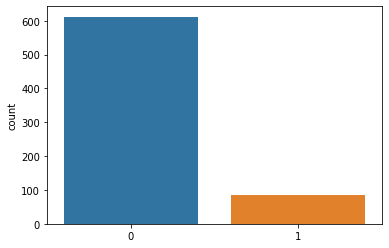

In [58]:
sns.countplot(prediction)

In [ ]:
pred = model.predict(test_pixel_data)
prediction = []
for value in pred:
  if value < 0.5:
     prediction.append(0)
  else:
    prediction.append(1)

#
res = pd.DataFrame({'filename': test_images['filename'], 'prediction': prediction}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res['prediction'].to_csv("submission_keras_transfer.csv", index = False)

# To download the csv file locally
from google.colab import files
files.download('submission_keras_transfer.csv')

#### **Classification Matrix**

In [ ]:
lb.classes_

array([0, 1])

In [ ]:
y_true=testY.argmax(axis=1)

In [ ]:
type(y_true)

numpy.ndarray

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true,predIdxs)

0.5285714285714286

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true,predIdxs)

0.9051724137931034

#### **Confusion Matrix**

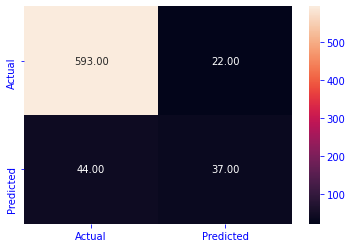

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf= confusion_matrix(y_true,predIdxs)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

**Try without image processing and check scores**

In [ ]:
history = model.fit(
	trainAug.flow(trainX1, trainY1, batch_size=BS),
	steps_per_epoch=len(trainX1) // BS,
	validation_data=(testX1, testY1),
	validation_steps=len(testX1) // BS,
	epochs=EPOCHS)

Epoch 1/25
347/347 [==============================] - 13s 37ms/step - loss: 0.2594 - accuracy: 0.8955 - val_loss: 0.2126 - val_accuracy: 0.9052
Epoch 2/25
347/347 [==============================] - 12s 35ms/step - loss: 0.2005 - accuracy: 0.9153 - val_loss: 0.2006 - val_accuracy: 0.9152
Epoch 3/25
347/347 [==============================] - 12s 35ms/step - loss: 0.1904 - accuracy: 0.9193 - val_loss: 0.1950 - val_accuracy: 0.9239
Epoch 4/25
347/347 [==============================] - 12s 35ms/step - loss: 0.1793 - accuracy: 0.9214 - val_loss: 0.1866 - val_accuracy: 0.9124
Epoch 5/25
347/347 [==============================] - 12s 35ms/step - loss: 0.1625 - accuracy: 0.9279 - val_loss: 0.2062 - val_accuracy: 0.9124
Epoch 6/25
347/347 [==============================] - 12s 35ms/step - loss: 0.1538 - accuracy: 0.9308 - val_loss: 0.1989 - val_accuracy: 0.9095
Epoch 7/25
347/347 [==============================] - 12s 35ms/step - loss: 0.1566 - accuracy: 0.9337 - val_loss: 0.1804 - val_accuracy:

In [ ]:
predIdxs = model.predict(testX1, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
y_true=testY1.argmax(axis=1)

F1 Score :0.6984126984126984
Accuracy Score : 0.9181034482758621


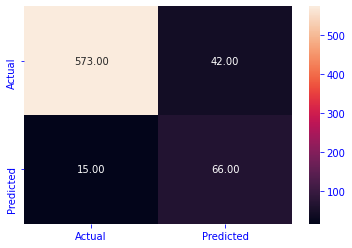

In [ ]:
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
print(f'F1 Score :{f1_score(y_true,predIdxs)}')
print(f'Accuracy Score : {accuracy_score(y_true,predIdxs)}')
cf= confusion_matrix(y_true,predIdxs)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

#### **Define Test Image preprocessing**

In [ ]:
tst = []
def testimage_processing(path,img_size):
  for i in os.listdir(path):
    image_path = path + "/" +i
    #Preprocess Image
    image_processed = cv2.imread(image_path)
    image_processed  = cv2.cvtColor(image_processed,cv2.COLOR_BGR2RGB)
    image_processed  = cv2.resize(image_processed,(img_size,img_size))
    tst.append(image_processed)
  return tst

In [ ]:
tst_image = testimage_processing("/content/content/covid_image_data/test",128)

In [ ]:
tst_image = np.array(tst_image)

In [ ]:
pred_proba = model.predict(tst_image)

In [ ]:
predictions = np.argmax(pred_proba, axis=1)

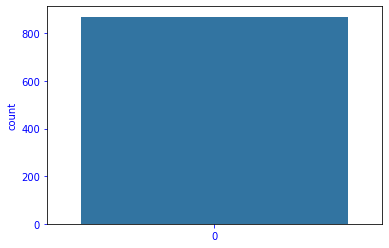

In [ ]:
sns.countplot(predictions)

## **Transfer Learning End**

In [ ]:
for i in os.listdir("/content/content/covid_image_data/train"):
  img_path = train_image_path + "/" + i
  image_original = cv2.imread(img_path)
  #Preprocess Image
  image_processed = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  image_processed = cv2.equalizeHist(image_processed)
  image_processed = cv2.medianBlur(image_processed ,3)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  image_processed  = clahe.apply(image_processed )
  image_processed  = cv2.cvtColor(image_processed,cv2.COLOR_GRAY2BGR)
  lbl = train[train['filename'] == i]['label'].tolist()[0]
  if lbl == 0:
    processed_image_path = "/content/Covid/Processed/Train/Covid_0/" + i
    cv2.imwrite(processed_image_path, image_processed)
  else:
    processed_image_path = "/content/Covid/Processed/Train/Covid_1/" + i
    cv2.imwrite(processed_image_path, image_processed)


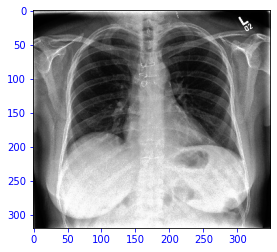

In [ ]:
plt.imshow(PIL.Image.open("/content/content/covid_image_data/train/Image_2446.jpg"))

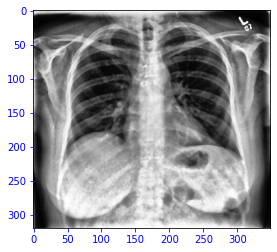

In [ ]:
plt.imshow(PIL.Image.open("/content/Image_2446.jpg"))

In [ ]:
train.label.value_counts()

0    3073
1     406
Name: label, dtype: int64

In [ ]:
len(os.listdir("/content/Covid/Processed/Train/Covid_1")),len(os.listdir("/content/Covid/Processed/Train/Covid_0"))

(406, 3073)

In [ ]:
!mkdir /content/dphi
!mkdir /content/dphi/covid19
!mkdir /content/dphi/covid19/Train
!mkdir /content/dphi/covid19/Train/covid_0
!mkdir /content/dphi/covid19/Train/covid_1

In [ ]:
!mkdir /content/dphi/covid19/Test

In [ ]:
for i in os.listdir("/content/content/covid_image_data/train"):
  if i in image_list:
    img_path =  "/content/content/covid_image_data/train/" + i
    if train[train['filename'] ==i]['label'].tolist()[0] == 0:
      shutil.copy(img_path,"/content/dphi/covid19/Train/covid_0")
    else:
      shutil.copy(img_path,"/content/dphi/covid19/Train/covid_1")

  

In [ ]:
for i in os.listdir("/content/Covid/Processed/Test"):
  shutil.move("/content/Covid/Processed/Test/"+i,"/content/dphi/covid19/Test")

In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor
# Build a new pipeline for image processing.
def imageAugmentation(source,output,num_samples):
  p = Augmentor.Pipeline(
      source_directory=source,
      output_directory=output)

  # Manipulate the example card.
  p.rotate_without_crop(
    probability=.3,
    max_left_rotation=10,
    max_right_rotation=10,
    expand=True)
  p.zoom(
    probability=.3,
    min_factor=.8,
    max_factor=1.1)
  p.skew(
    probability=.3,
    magnitude=.15)
  p.random_brightness(
    probability=.5,
    min_factor=.5,
    max_factor=1.75)

  # Generate and save num_samples of  new images to the output directory.
  p.sample(num_samples=200)

In [ ]:
imageAugmentation("/content/dphi/covid19/Train/covid_1","/content/dphi/covid19/Train/covid_1",200)

Executing Pipeline:   0%|          | 0/200 [00:00<?, ? Samples/s]

Initialised with 406 image(s) found.
Output directory set to /content/dphi/covid19/Train/covid_1.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2000x2000 at 0x7F40C75A0748>: 100%|██████████| 200/200 [00:40<00:00,  4.91 Samples/s]


In [ ]:
len(os.listdir("/content/dphi/covid19/Train/covid_1"))

606

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,Layer,AveragePooling2D,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPool2D,MaxPooling2D
#
from tensorflow.keras.applications import VGG16
#
from tensorflow.keras.optimizers import Adam
#
from tensorflow.keras.utils import to_categorical
#
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score

# 

In [ ]:
def process_image(path_dir):
  dataset = []
  labels = []
  folder_images = os.listdir(path_dir)
  
  for folder in folder_images:
    print(folder)
    image_list = os.listdir(path_dir + "/"+folder+"/")
    #print(len(image_list))
    for images in image_list:
      #print(images)
      #print(path_dir+"/"+folder+"/" +images)
      image = cv2.imread(path_dir+"/"+folder+"/" +images)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
      image = Image.fromarray(image)
      image = image.resize((224,224))
      dataset.append(np.array(image))
      if folder == 'covid_1':
        labels.append(1)
      else:
        labels.append(0)
  return np.array(dataset),np.array(labels)


In [ ]:
X,Y= process_image("/content/dphi/covid19/Train")

covid_1
covid_0


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [ ]:
x_train.shape,y_train.shape

((2943, 224, 224, 3), (2943,))

In [ ]:
y_train

array([0, 0, 0, 0, ..., 0, 0, 1, 1])

In [ ]:
x_train = x_train.astype(int)
x_test = x_test.astype(int)


In [ ]:
x_train[0]

array([[[ 76,  76,  76],
        [ 21,  21,  21],
        [ 12,  12,  12],
        [ 10,  10,  10],
        ...,
        [110, 110, 110],
        [121, 121, 121],
        [110, 110, 110],
        [111, 111, 111]],

       [[ 23,  23,  23],
        [ 11,  11,  11],
        [  8,   8,   8],
        [  8,   8,   8],
        ...,
        [133, 133, 133],
        [134, 134, 134],
        [134, 134, 134],
        [129, 129, 129]],

       [[ 17,  17,  17],
        [ 10,  10,  10],
        [  6,   6,   6],
        [  5,   5,   5],
        ...,
        [ 60,  60,  60],
        [ 67,  67,  67],
        [ 77,  77,  77],
        [ 88,  88,  88]],

       [[ 15,  15,  15],
        [  8,   8,   8],
        [  8,   8,   8],
        [  5,   5,   5],
        ...,
        [ 13,  13,  13],
        [ 14,  14,  14],
        [ 19,  19,  19],
        [ 28,  28,  28]],

       ...,

       [[225, 225, 225],
        [221, 221, 221],
        [235, 235, 235],
        [249, 249, 249],
        ...,
        [170, 

In [ ]:
x_train.shape,y_train.shape,type(x_train)

((2943, 224, 224, 3), (2943,), numpy.ndarray)

Text(0.5, 1.0, 'LABEL 0')

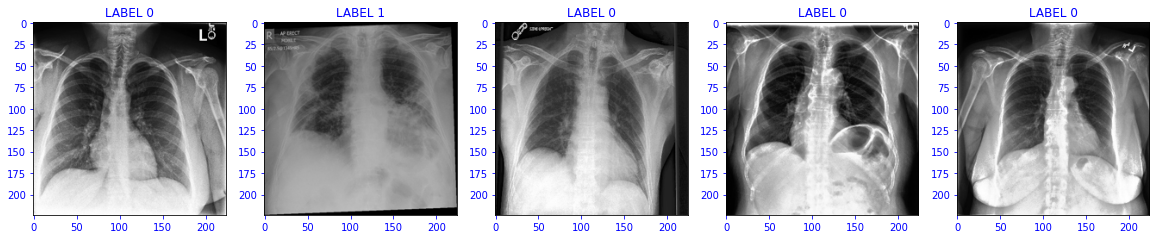

In [ ]:
plt.figure(figsize = (20, 12))
plt.subplot(1,5,1)
plt.imshow(x_train[0])
plt.title('LABEL '+str(y_train[0]))
plt.subplot(1,5,2)
plt.imshow(x_train[100])
plt.title('LABEL '+str(y_train[100]))
plt.subplot(1,5,3)
plt.imshow(x_train[10])
plt.title('LABEL '+str(y_train[10]))
plt.subplot(1,5,4)
plt.imshow(x_train[20])
plt.title('LABEL '+str(y_train[20]))
plt.subplot(1,5,5)
plt.imshow(x_train[25])
plt.title('LABEL '+str(y_train[25]))

Text(0.5, 1.0, 'LABEL 0')

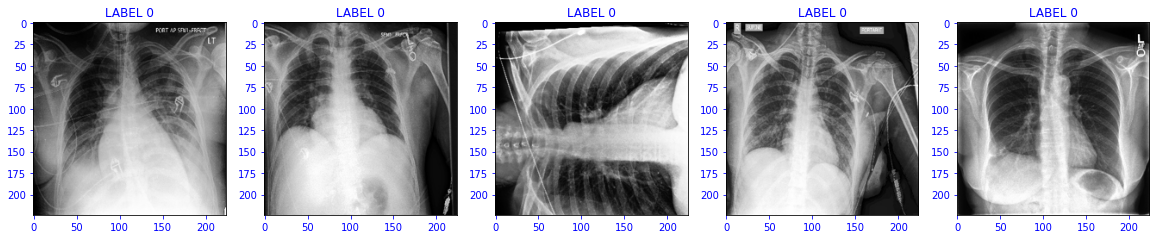

In [ ]:
plt.figure(figsize = (20, 12))
plt.subplot(1,5,1)
plt.imshow(x_test[0])
plt.title('LABEL '+str(y_test[0]))
plt.subplot(1,5,2)
plt.imshow(x_test[100])
plt.title('LABEL '+str(y_test[100]))
plt.subplot(1,5,3)
plt.imshow(x_test[10])
plt.title('LABEL '+str(y_test[10]))
plt.subplot(1,5,4)
plt.imshow(x_test[20])
plt.title('LABEL '+str(y_test[20]))
plt.subplot(1,5,5)
plt.imshow(x_test[25])
plt.title('LABEL '+str(y_test[25]))

In [19]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# create model
def classifier(IMG_SIZE):
    model = Sequential()
#     model.add(keras.Input(shape=(None, IMG_SIZE, IMG_SIZE, 3)))
#     Convolutional layer 1 with 32 filters of kernel size[5,5] 
    model.add(Conv2D(filters=32, kernel_size=(5, 5), 
                     strides=(1, 1), activation='relu', 
                     input_shape=(IMG_SIZE, IMG_SIZE, 3)))
#     Pooling layer 1 with pool size[2,2] and stride 2 
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
#     Convolutional layer 2 with 64 filters of kernel size[5,5] 
    model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
#  Pooling layer 2 with pool size[2,2] and stride 2 
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
## Newly Added
#     Convolutional layer 2 with 64 filters of kernel size[5,5] 
    model.add(Conv2D(128, (5, 5), strides=(1, 1), activation='relu'))
#  Pooling layer 2 with pool size[2,2] and stride 2 
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
## Newly Added
    model.add(Flatten())
    
#     Dense layer whose output size is fixed in the hyper parameter: 
    model.add(Dense(units=64, activation='relu'))
    
#     Dropout layer with dropout probability 0.4 
    model.add(Dropout(0.3))
    #     Dense layer whose output size is fixed in the hyper parameter: 
    model.add(Dense(units=32, activation='relu'))
    
#     Dropout layer with dropout probability 0.4 
    model.add(Dropout(0.2))
    
#     units is 2 because we have 2 classes to predict 
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Compile model
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # compile model
    model.compile(
             #optimizer=RMSprop(lr=0.001),
             optimizer=Adam(lr=0.0001),
             loss='binary_crossentropy',
             metrics=['accuracy',f1_m])
    return model

In [ ]:
model = classifier(150)

NameError: ignored

In [ ]:
model.summary()

NameError: ignored

In [ ]:
trainY1 = np.argmax(trainY1,axis=1)

In [ ]:
testY1 = np.argmax(testY1,axis=1)

#### **Implement callback function to stop training when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95**

In [ ]:
import tensorflow as tf
ACCURACY_THRESHOLD = 0.95
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
          self.model.stop_training = True

In [ ]:
testY1.shape

(696, 2)

In [31]:
from sklearn.metrics import f1_score
import tensorflow as tf

class IntervalEvaluation(tf.keras.callbacks.Callback):
    def __init__(self, validation_data=()):
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
      y_pred = self.model.predict(self.X_val, verbose=0)
      prediction = []
      for i in y_pred:
        if i < 0.5:
          prediction.append(0)
        else:
          prediction.append(1)

      f1score = f1_score(self.y_val,prediction)
      print("interval evaluation - epoch: {:d} - score: {:.6f}".format(epoch, f1score))
      if f1score > 0.80:
        self.model.stop_training = True

In [ ]:
callbacks = myCallback()

NameError: ignored

In [32]:
ival = IntervalEvaluation(validation_data=(testX1,testY1))

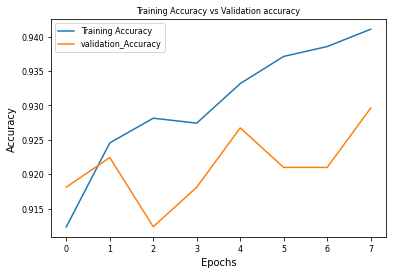

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')
plt.title('Training Accuracy vs Validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

In [ ]:
history = model.fit(trainX1, trainY1, validation_data=(testX1,testY1), epochs=100, verbose=2,class_weight={0:1,1:2},callbacks=[ival])

NameError: ignored

Text(0, 0.5, 'Loss')

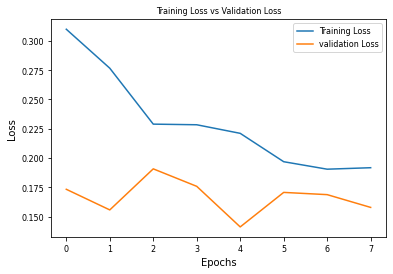

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Loss')

In [ ]:
preds = model.predict(testX1)
prediction = []
for value in preds:
  if value < 0.5:
     prediction.append(0)
  else:
    prediction.append(1)

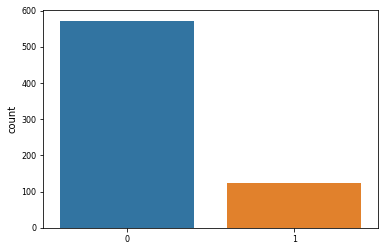

In [ ]:
import seaborn as sns
sns.countplot(prediction)

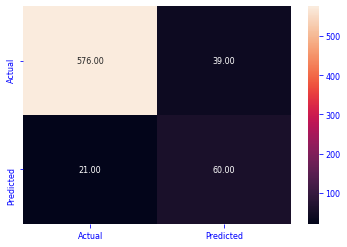

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(testY1,prediction)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

In [ ]:
from sklearn.metrics import f1_score
f1_score(testY1,prediction)

0.6666666666666666

#### **epochs = 10 with callback when f1_score > 75%

In [ ]:
from sklearn.metrics import f1_score
f1_score(testY1,prediction)

0.7609756097560976

**epochs = 54 due to callback**

In [ ]:
preds = model.predict(testX1)
prediction = []
for value in preds:
  if value < 0.5:
     prediction.append(0)
  else:
    prediction.append(1)

In [ ]:
from sklearn.metrics import f1_score
f1_score(testY1,prediction)

0.8048780487804877

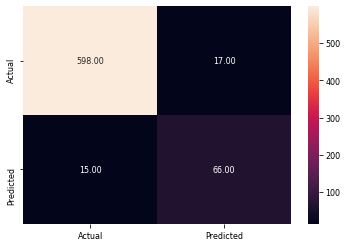

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(testY1,prediction)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

**Dphi Score 72.34042553191489**

#### **F1 score after incorporating callbacks**

In [ ]:
preds = model.predict(testX1)
prediction = []
for value in preds:
  if value < 0.5:
     prediction.append(0)
  else:
    prediction.append(1)

In [ ]:
from sklearn.metrics import f1_score
f1_score(testY1,prediction)

0.7934782608695652

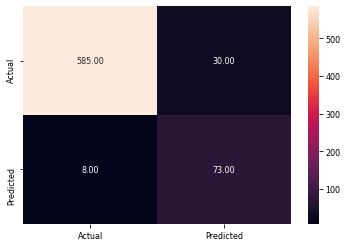

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(testY1,prediction)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

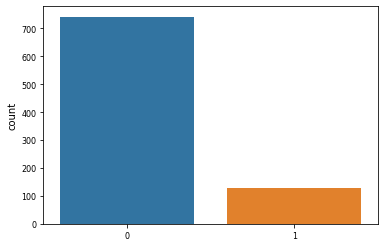

In [ ]:
sns.countplot(prediction)

**Dphi submission 78.26086956521738**

**Epochs= 15**

In [ ]:
from sklearn.metrics import f1_score
f1_score(testY1,prediction)

0.7674418604651162

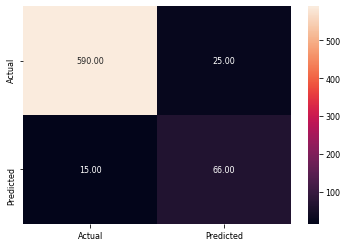

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(testY1,prediction)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

**After Increasing epochs to 25**

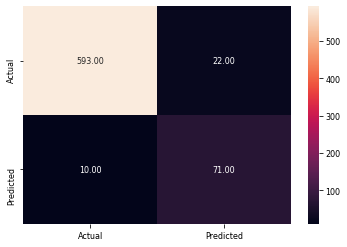

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(testY1,prediction)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

In [ ]:
from sklearn.metrics import f1_score
f1_score(testY1,prediction)

0.8160919540229884

**Dphi submission 80.38277511961724**

**After increasing epochs to 50**

In [ ]:
from sklearn.metrics import f1_score
f1_score(testY1,prediction)

0.7307692307692308

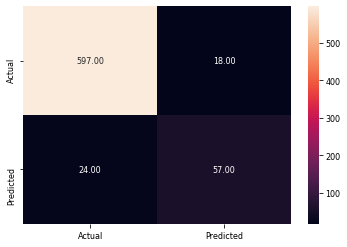

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(testY1,prediction)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=['Actual','Predicted'],yticklabels=['Actual','Predicted'])

In [36]:
file_paths = [[fname, '/content/content/covid_image_data/test/' + fname] for fname in test['filename']]
if len(test) == len(file_paths):
  print('Number of image names i.e. ', len(test), 'matches the number of file paths i.e. ', len(file_paths))
else:
  print('Number of image names does not match the number of filepaths')

#
test_images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_images.head()

Number of image names i.e.  870 matches the number of file paths i.e.  870


,filename,filepaths
0,Image_1.jpg,/content/content/covid_image_data/test/Image_1...
1,Image_2.jpg,/content/content/covid_image_data/test/Image_2...
2,Image_3.jpg,/content/content/covid_image_data/test/Image_3...
3,Image_4.jpg,/content/content/covid_image_data/test/Image_4...
4,Image_5.jpg,/content/content/covid_image_data/test/Image_5...


In [ ]:
test_pixel_data = [] # initialize an empty numpy array
image_size = 150 # image size taken is 100 here. one can take other size too
for i in range(len(test_images)):
  image_processed= cv2.imread(test_images['filepaths'][i]) # converting the image to gray scale
  image_processed  = cv2.cvtColor(image_processed,cv2.COLOR_BGR2RGB)
  new_img_array = cv2.resize(image_processed, (image_size, image_size)) # resizing the image array

  test_pixel_data.append(new_img_array)

#
test_pixel_data = np.array(test_pixel_data)
test_pixel_data  = test_pixel_data.astype(int)
print(test_pixel_data.shape)
#
print(test_pixel_data.shape)
pred = model.predict(test_pixel_data)
prediction = []
for value in pred:
  if value < 0.5:
     prediction.append(0)
  else:
    prediction.append(1)

#
res = pd.DataFrame({'filename': test_images['filename'], 'prediction': prediction}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res['prediction'].to_csv("submission_keras_callback1.csv", index = False)

# To download the csv file locally
from google.colab import files
files.download('submission_keras_callback1.csv')

(870, 150, 150, 3)
(870, 150, 150, 3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

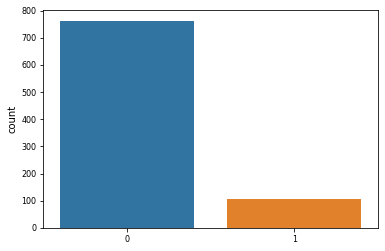

In [ ]:
sns.countplot(prediction)

**Create Another Model which inputs image size as 150 * 150 - did not work**

In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [ ]:
def build_model(INPUT_SHAPE):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64,(3,3)))
  model.add(Activation("relu"))
  model.add(Conv2D(250,(3,3)))
  model.add(Activation("relu"))
  
  model.add(Conv2D(128,(3,3)))
  model.add(Activation("relu"))
  model.add(AvgPool2D(2,2))
  model.add(Conv2D(64,(3,3)))
  model.add(Activation("relu"))
  model.add(AvgPool2D(2,2))

  model.add(Conv2D(256,(2,2)))
  model.add(Activation("relu"))
  model.add(MaxPool2D(2,2))
    
  model.add(Flatten())
  model.add(Dense(32))
  model.add(Dropout(0.25))
  model.add(Dense(1))
  model.add(Activation("sigmoid"))
  model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy',f1_m])
  return model

In [ ]:
model = build_model(INPUT_SHAPE)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 64)       

In [ ]:
trainX1.shape,testX1.shape

((2783, 150, 150, 3), (696, 150, 150, 3))

In [ ]:
history = model.fit(
	trainAug.flow(trainX1, trainY1, batch_size=BS),
	steps_per_epoch=len(trainX1) // BS,
	validation_data=(testX1, testY1),
	validation_steps=len(testX1) // BS,
	epochs=EPOCHS,class_weight={0:1,1:2})

Epoch 1/48
347/347 [==============================] - 15s 44ms/step - loss: 0.5934 - accuracy: 0.8771 - f1_m: 0.0458 - val_loss: 0.3501 - val_accuracy: 0.8836 - val_f1_m: 0.0134
Epoch 2/48
347/347 [==============================] - 14s 42ms/step - loss: 0.5169 - accuracy: 0.8836 - f1_m: 0.2888 - val_loss: 0.1857 - val_accuracy: 0.8994 - val_f1_m: 0.3459
Epoch 3/48
347/347 [==============================] - 14s 42ms/step - loss: 0.6115 - accuracy: 0.8941 - f1_m: 0.3617 - val_loss: 0.1931 - val_accuracy: 0.8980 - val_f1_m: 0.3326
Epoch 4/48
347/347 [==============================] - 14s 42ms/step - loss: 0.5169 - accuracy: 0.8966 - f1_m: 0.3752 - val_loss: 0.1843 - val_accuracy: 0.9095 - val_f1_m: 0.3779
Epoch 5/48
347/347 [==============================] - 14s 42ms/step - loss: 0.4469 - accuracy: 0.8897 - f1_m: 0.3684 - val_loss: 0.1951 - val_accuracy: 0.9009 - val_f1_m: 0.4391
Epoch 6/48
347/347 [==============================] - 14s 42ms/step - loss: 0.9998 - accuracy: 0.8886 - f1_m: 